## CSCI 5622-073: Machine Learning Project
## Author: Nikhil B M
## University of Colorado, Boulder

# Data Visualization

Importing Required Libraries

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Read Data

In [68]:
# read the data
input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/NYC_Taxi_Data/"
weather_input_dir = "D:/2_MS_in_DS/2nd_Semester/Machine_Learning/Project/Data/Weather_Data/"

nyc_taxi_Jan_2022_cleaned = pd.read_csv(input_dir+"yellow_tripdata_2022-01_cleaned.csv")
#nyc_taxi_Feb_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-02.parquet")
#nyc_taxi_Mar_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-03.parquet")
#nyc_taxi_Apr_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-04.parquet")
#nyc_taxi_May_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-05.parquet")
#nyc_taxi_Jun_2022 = pd.read_parquet(input_dir+"yellow_tripdata_2022-06.parquet")


weather_data_Jan_2022 =  pd.read_csv(weather_input_dir+"weather_data_Jan_2022_cleaned.csv")

In [69]:
nyc_taxi_Jan_2022_cleaned.drop(columns=['Unnamed: 0'], inplace =True)
nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime']= pd.to_datetime(nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime'])
nyc_taxi_Jan_2022_cleaned['tpep_dropoff_datetime']= pd.to_datetime(nyc_taxi_Jan_2022_cleaned['tpep_dropoff_datetime'])

In [70]:
nyc_taxi_Jan_2022_cleaned.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
trip_times                      float64
pickup_times                    float64
Speed                           float64
dtype: object

In [71]:
nyc_taxi_Jan_2022_cleaned.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,1.641023e+09,12.797007
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,1.641022e+09,15.000000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,1.641024e+09,6.490706
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,1.641022e+09,6.518272
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,1.641023e+09,6.873890


In [72]:
weather_data_Jan_2022.head()

,Unnamed: 0,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,conditions,icon,stations
0,0,"New York, NY, United States",2022-01-01T00:00:00,51.2,51.2,47.0,85.69,0.0,0,0.0,0.0,5.6,160,1012.7,100.0,7.6,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
1,1,"New York, NY, United States",2022-01-01T01:00:00,51.2,51.2,47.0,85.69,0.0,0,0.0,0.0,1.9,69,1012.5,100.0,7.2,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
2,2,"New York, NY, United States",2022-01-01T02:00:00,51.2,51.2,47.7,87.84,0.0,0,0.0,0.0,0.0,0,1012.6,100.0,6.3,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
3,3,"New York, NY, United States",2022-01-01T03:00:00,51.2,51.2,47.0,85.69,0.0,0,0.0,0.0,5.0,137,1012.2,100.0,8.2,Overcast,cloudy,"72505394728,KLGA,KNYC,72503014732"
4,4,"New York, NY, United States",2022-01-01T04:00:00,50.2,50.2,47.8,91.36,0.0,0,0.0,0.0,5.3,152,1011.2,100.0,7.1,Overcast,cloudy,"72505394728,KLGA,KNYC"


## Data Exploration and Visualization

### 1. Checking the frequency of rides during the week.

In [73]:
nyc_taxi_Jan_2022_cleaned['WeekDay'] = nyc_taxi_Jan_2022_cleaned['tpep_pickup_datetime'].dt.day_name()

In [74]:
nyc_taxi_Jan_2022_cleaned.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed,WeekDay
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,...,3.65,0.0,0.3,21.95,2.5,0.0,17.816667,1.641023e+09,12.797007,Saturday
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,...,4.00,0.0,0.3,13.30,0.0,0.0,8.400000,1.641022e+09,15.000000,Saturday
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,...,1.76,0.0,0.3,10.56,0.0,0.0,8.966667,1.641024e+09,6.490706,Saturday
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,...,0.00,0.0,0.3,11.80,2.5,0.0,10.033333,1.641022e+09,6.518272,Saturday
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,...,3.00,0.0,0.3,30.30,2.5,0.0,37.533333,1.641023e+09,6.873890,Saturday


In [75]:
WeekDayCount = pd.DataFrame()
WeekDayCount['Count']=nyc_taxi_Jan_2022_cleaned.groupby(['WeekDay'])['WeekDay'].count()
WeekDayCount = WeekDayCount.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])

In [76]:
WeekDayCount

,Count
WeekDay,
Monday,347355
Tuesday,303052
Wednesday,316388
Thursday,332325
Friday,336029
Saturday,337441
Sunday,316946


Text(0.5, 1.0, 'Count indicating the Taxi rides')

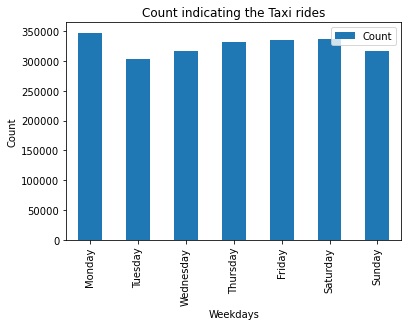

In [77]:
WeekDayCount.plot(kind="bar")
plt.xlabel('Weekdays') 
plt.ylabel('Count') 
plt.title("Count indicating the Taxi rides")

Above graph shows that there is high activity in terms people taking taxis on Mondays and relatively lower activity during the week and steadly rises through out the week.

## 2. Correlation Between the attributes

In [78]:
# load the Auto dataset
auto_df = nyc_taxi_Jan_2022_cleaned

# calculate the correlation matrix
corr = auto_df.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_times,pickup_times,Speed
VendorID,1.00,0.10,0.01,-0.09,-0.01,-0.00,-0.02,0.00,-0.88,0.01,0.02,0.01,-0.00,0.01,0.01,0.02,-0.01,-0.00,0.05
passenger_count,0.10,1.00,0.02,-0.02,-0.01,-0.00,0.01,0.02,-0.08,-0.01,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02,0.02
trip_distance,0.01,0.02,1.00,0.10,-0.12,-0.10,0.01,0.96,0.02,-0.16,0.55,0.64,0.00,0.95,-0.34,0.68,0.73,-0.05,0.76
RatecodeID,-0.09,-0.02,0.10,1.00,-0.04,-0.03,-0.03,0.14,-0.05,-0.02,-0.03,0.07,-0.00,0.10,-0.21,0.00,0.14,0.01,0.02
PULocationID,-0.01,-0.01,-0.12,-0.04,1.00,0.08,-0.03,-0.11,0.01,0.01,-0.05,-0.07,-0.00,-0.11,0.14,-0.13,-0.08,0.01,-0.11
DOLocationID,-0.00,-0.00,-0.10,-0.03,0.08,1.00,-0.04,-0.10,0.01,0.04,-0.04,-0.05,-0.00,-0.09,0.13,-0.06,-0.09,0.01,-0.09
payment_type,-0.02,0.01,0.01,-0.03,-0.03,-0.04,1.00,0.01,-0.01,-0.01,-0.44,-0.01,-0.00,-0.08,-0.11,0.03,0.01,-0.04,-0.00
fare_amount,0.00,0.02,0.96,0.14,-0.11,-0.10,0.01,1.00,0.01,-0.26,0.55,0.63,-0.01,0.98,-0.34,0.62,0.77,-0.02,0.66
extra,-0.88,-0.08,0.02,-0.05,0.01,0.01,-0.01,0.01,1.00,0.02,0.03,0.03,0.00,0.04,0.12,0.02,0.02,0.02,-0.02
mta_tax,0.01,-0.01,-0.16,-0.02,0.01,0.04,-0.01,-0.26,0.02,1.00,-0.13,-0.33,0.03,-0.26,0.15,-0.02,-0.09,0.01,-0.12


From the above correlation plot, we can confirm that only few of the variables are highly correlated.

They are:
    
    i. Trip_distance vs Fare_amount: This confirms the initial assumption that longer the trip distance, the higher is the fare. It is also followed by tip_amount and toll_amount with respect to trip_distance.
    ii. Trip_distance vs Trip_times: Even these attributes follows the same lines as above relation. 
    iii. Speed vs Trip_distance: As the trip_distance increases, speed too increases. 
    iv. Speed vs fare_amount: Even these attributes follows the same lines as above relation.

In [79]:
# load the Auto dataset
auto_df = weather_data_Jan_2022

# calculate the correlation matrix
corr = auto_df.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,Unnamed: 0,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility
Unnamed: 0,1.00,-0.43,-0.40,-0.42,-0.28,-0.05,-0.04,-0.20,0.26,0.01,-0.04,0.10,-0.06,-0.01
temp,-0.43,1.00,0.97,0.90,0.50,0.15,0.17,0.06,-0.30,-0.19,-0.05,-0.58,0.46,-0.18
feelslike,-0.40,0.97,1.00,0.87,0.48,0.12,0.16,0.06,-0.31,-0.39,-0.09,-0.51,0.43,-0.16
dew,-0.42,0.90,0.87,1.00,0.82,0.30,0.41,0.03,-0.23,-0.16,-0.12,-0.67,0.61,-0.44
humidity,-0.28,0.50,0.48,0.82,1.00,0.44,0.63,-0.01,-0.07,-0.07,-0.17,-0.58,0.62,-0.70
precip,-0.05,0.15,0.12,0.30,0.44,1.00,0.62,0.08,0.03,0.16,-0.14,-0.29,0.28,-0.56
precipprob,-0.04,0.17,0.16,0.41,0.63,0.62,1.00,0.10,0.09,0.07,-0.09,-0.32,0.44,-0.80
snow,-0.20,0.06,0.06,0.03,-0.01,0.08,0.10,1.00,0.16,-0.03,-0.01,-0.12,0.06,-0.12
snowdepth,0.26,-0.30,-0.31,-0.23,-0.07,0.03,0.09,0.16,1.00,0.17,0.10,-0.02,-0.04,-0.11
windspeed,0.01,-0.19,-0.39,-0.16,-0.07,0.16,0.07,-0.03,0.17,1.00,0.18,-0.19,0.03,-0.03


From the above correlation plot, we can confirm that only a few of the variables are highly correlated. 

They are:

i. Temp vs feelslike vs drew: These columns are highly correlated if the temperature directly affects the others. 

ii. Precipprob bs humidity: If the humidity is more, there is a high chance that precipitation is also high.

## 3. Distribution of Trip-times

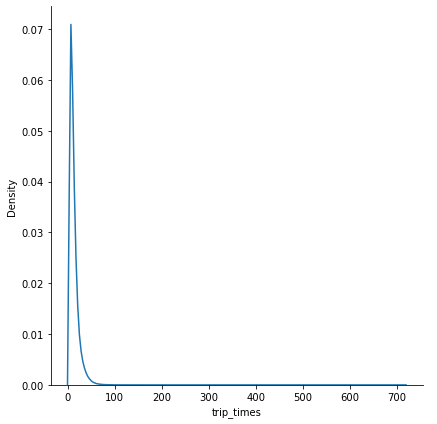

In [45]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(nyc_taxi_Jan_2022_cleaned,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

Above is the pdf of Trip-times. Its right skewed so taking log which is normally distributed between -3 t0 3.

Lets plot log-value of time duration

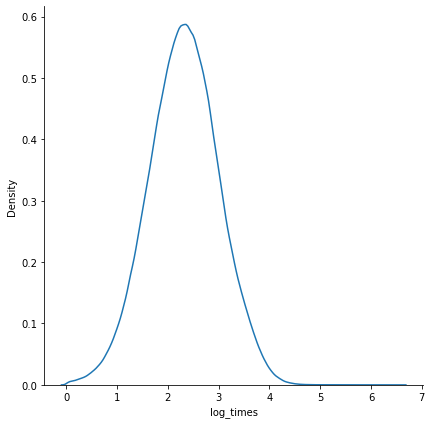

In [43]:
#converting the values to log-values to chec for log-normal
nyc_taxi_Jan_2022_cleaned['log_times']=[math.log(i) for i in nyc_taxi_Jan_2022_cleaned['trip_times'].values]

#pdf of log-values
sns.FacetGrid(nyc_taxi_Jan_2022_cleaned,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

It look like bell shape but there is short tail on left in above plot. So lets plot Q-Q plot to check distribution.

Q-Q plot for checking if trip-times is log-normal

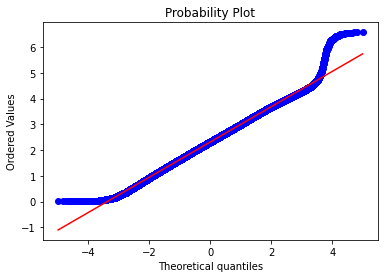

In [44]:
#Q-Q plot for checking if trip-times is log-normal
scipy.stats.probplot(nyc_taxi_Jan_2022_cleaned['log_times'].values, plot=plt)
plt.show()

Log of trip time value lie between -3 to 3 follow Gaussian distribution so let clean data outside of this range.

## 4. Highest number of Pick and Drop points

In [49]:
np.random.seed(5)
plot_df = (
    nyc_taxi_Jan_2022_cleaned['PULocationID'].value_counts()
        .head(10)
        .rename_axis('value')
        .reset_index(name='counts')
)

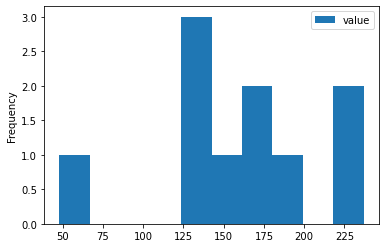

In [50]:
ax = plot_df.plot(x='counts', kind='hist')

In [86]:
df2 =pd.DataFrame()
df2['Frequency']= nyc_taxi_Jan_2022_cleaned.groupby(['PULocationID'])['PULocationID'].count()
df2.sort_values(by=['Frequency'], ascending=False, inplace=True)
df2.head()

,Frequency
PULocationID,
237,115517
236,113804
132,96597
161,83944
186,76763


## Trip Distance vs. Fare Amount

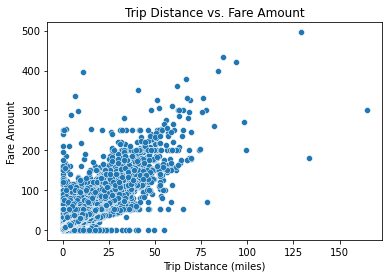

In [98]:


# load the dataset and extract the relevant columns
df = nyc_taxi_Jan_2022_cleaned
df = df[["trip_distance", "fare_amount"]]

# plot scatter plot
sns.scatterplot(x="trip_distance", y="fare_amount", data=df)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs. Fare Amount")
plt.show()


## Percentage of Rides by Rate Code

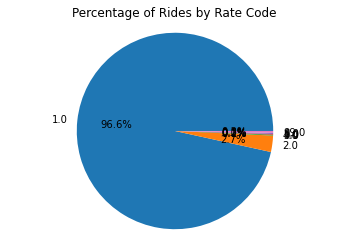

In [25]:
# load the dataset and calculate percentage of rides by rate code
df = nyc_taxi_Jan_2022_cleaned
grouped_df = df.groupby(["RatecodeID"]).count()["fare_amount"]
grouped_df = grouped_df / grouped_df.sum() * 100

# plot pie chart
grouped_df.plot.pie(autopct="%.1f%%")
plt.axis("equal")
plt.xlabel("")
plt.ylabel("")
plt.title("Percentage of Rides by Rate Code")
plt.show()

## Number of Rides by Day of Week

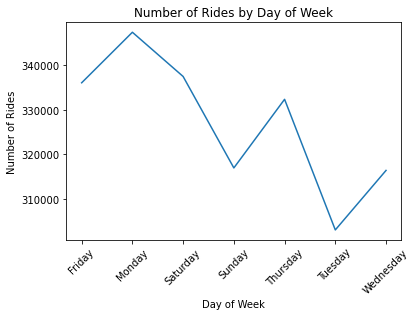

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset and calculate number of rides by day of the week
df = nyc_taxi_Jan_2022_cleaned
df["day_of_week"] = df["tpep_pickup_datetime"].dt.day_name()
grouped_df = df.groupby(["day_of_week"]).count()["fare_amount"]

# plot line chart
sns.lineplot(x=grouped_df.index, y=grouped_df.values)
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.title("Number of Rides by Day of Week")
plt.xticks(rotation=45)
plt.show()

## Total Fare Breakdown by Payment Type

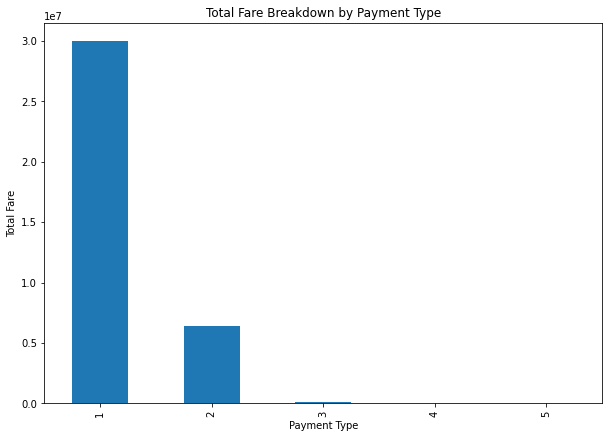

In [31]:
# load your dataset into a pandas dataframe
df = nyc_taxi_Jan_2022_cleaned

# calculate total fare breakdown
df['Total_Fare'] = df['fare_amount'] + df['extra'] + df['tip_amount']
total_fare_breakdown = df.groupby('payment_type').sum()['Total_Fare']

# create the stacked bar chart
ax = total_fare_breakdown.plot(kind='bar', stacked=True, figsize=(10,7))
ax.set_xlabel('Payment Type')
ax.set_ylabel('Total Fare')
ax.set_title('Total Fare Breakdown by Payment Type')
plt.show()

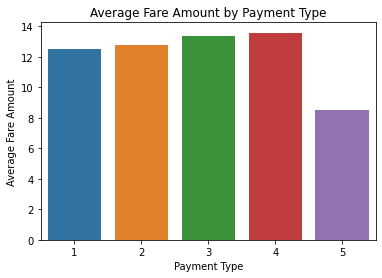

In [82]:
# load the dataset and calculate average fare by payment type
df = nyc_taxi_Jan_2022_cleaned
grouped_df = df.groupby(["payment_type"]).mean()["fare_amount"]

# plot bar chart
sns.barplot(x=grouped_df.index, y=grouped_df.values)
plt.xlabel("Payment Type")
plt.ylabel("Average Fare Amount")
plt.title("Average Fare Amount by Payment Type")
plt.show()


## The distribution of No. of pickups and dropoff on each part of the day

In [33]:
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

# load your dataset into a pandas dataframe
df = nyc_taxi_Jan_2022_cleaned
df['pickup_timezone']=df['tpep_pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['tpep_dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

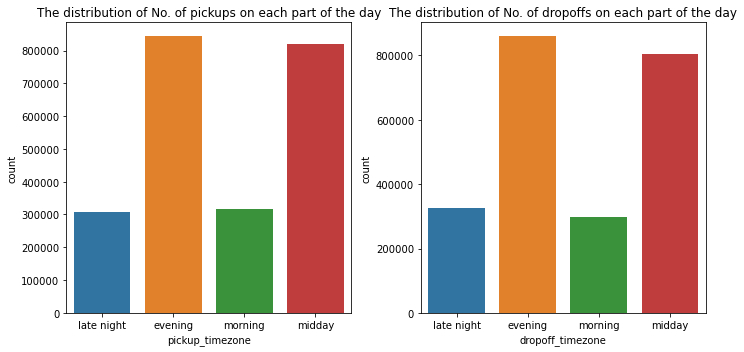

In [45]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of No. of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of No. of dropoffs on each part of the day')

#plt.show()
plt.tight_layout()

## The relationship between Pickup hour vs Trip Duration

[Text(0.5, 1.0, 'Pickup hour vs Trip Duration')]

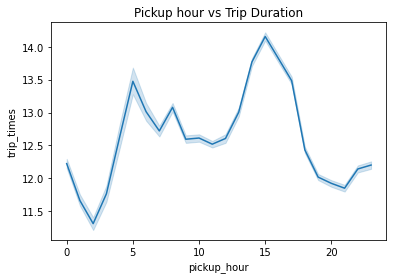

In [67]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour
sns.lineplot(x='pickup_hour',y='trip_times',data=df).set(title="Pickup hour vs Trip Duration")

## The relationship between passenger count and duration

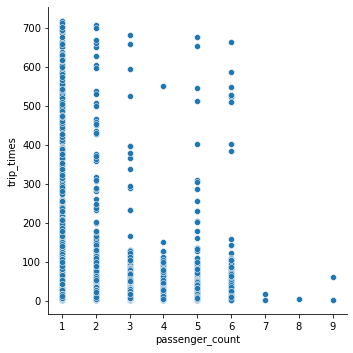

In [54]:
sns.relplot(x="passenger_count", y="trip_times", data=df, kind="scatter")

## The relationship between vendor id and duration

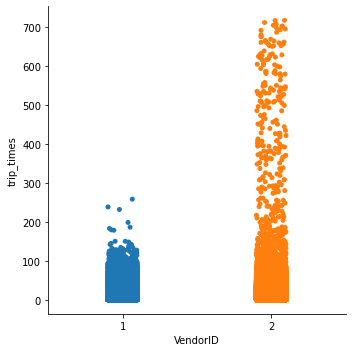

In [57]:
sns.catplot(x="VendorID", y="trip_times",kind="strip",data=df)